# 2. Introduction to Geospatial Data


<br>
    
**INSTRUCTOR NOTES**:
- Datasets used:
    - "../notebook_data/census/Tracts/cb_2018_06_tract_500k.shp"
    - "zip://../notebook_data/census/Tracts/cb_2018_06_tract_500k.zip"

- Expected time to complete:
    - Lecture + Questions: 20 minutes
    - Challenges: 5 minutes


## 2.1 What is Geospatial data?
<br>
<div style="display:inline-block;vertical-align:top;">
    <img src="../../assets/images/light_bulb.png" width="30" align=left > 
</div>  
<div style="display:inline-block;">


#### Question
</div>

On a scale of 1 (total newbie) to 5 (I do it in my sleep), how comfortable are you in...
1. Geospatial concepts?
2. Geospatial analyses in Python?


#### Terminology

Just so we are on the same page..

- `Geographic data` is data about locations on or near the surface of the Earth.

- `Geospatial data`  is geographic data that can be explictly located on the surface of the Earth because it contains coordinates like latitude and longitude.

- `Spatial data` is a more generic term that includes geospatial data as well as other kinds of spatial data.


## 2.2 GeoPandas

### GeoPandas and related Geospatial Packages

[GeoPandas](http://geopandas.org/) is a relatively new package that makes it easier to work with geospatial data in Python. In the last few years it has grown more powerful and stable. This really is great because previously it was quite complex to work with geospatial data in Python. GeoPandas is now the go to package for working with `vector` geospatial data in Python. 

> **Pro-tip**: If you work with `raster` data you will want to checkout the [rasterio](https://rasterio.readthedocs.io/en/latest/) package. We will not cover raster data in this tutorial.

### GeoPandas = pandas + geo
GeoPandas gives you access to all of the functionality of [pandas](https://pandas.pydata.org/), which is the primary data analysis tool for working with tabular data in Python. GeoPandas extends pandas with attributes and methods for working with geospatial data.



### Import Libraries

Let's start by importing the libraries that we will use.

In [1]:
import pandas as pd
import geopandas as gpd

import matplotlib # base python plotting library
import matplotlib.pyplot as plt # submodule of matplotlib

# To display plots, maps, charts etc in the notebook
%matplotlib inline  

<a id="section3"></a>
## 2.3 Census tracts

The first geospatial data we're going to bring in are the Census tract data.

### About Census Geographic Data:

There are two main types of census geographic data products: 
- TIGER/Line Files 
  - contain detailed geometry, big files
  - not pretty for mapping
  - good for spatial analysis
  - have a `tl` (as in `T`IGER/`L`ine) in the filename when downloaded from Census web or FTP site.
    - e.g., tl_2018_06_tract.zip
    
  
- [Cartographic Boundary files](https://www.census.gov/programs-surveys/geography/technical-documentation/naming-convention/cartographic-boundary-file.html): 
  - smaller file sizes, 
  - made specifically for mapping,
  - have a `cb` in the file name when downloaded from Census web or FTP site
      - e.g., cb_2018_06_tract_500k.zip
  - have a mapping resolution at the end of the file name, 
    - eg `_500k` files look best around 1:500K map scale
  
### Several ways to obtain Census Geographic data

1. Fetch via API - although not all years may be available.
2. Download from Census website or FTP site
3. Download from another website like [NHGIS.org](https://nhgis.org)

### What files should you download?

Census tract geographic data files are updated frequently to improve the quality of the spatial data, but the most significant updates happen for all census geographies just before the decennial census.

When mapping or spatially analyzing ACS 5 year data, download the geographic files with the same year as the end date as the ACS5 year data you are analyzing.

For example, we can use the following URLs to download 2013 and 2018 census tracts for California.

- Cartographic Boundary File for CA Census Tracts, 2013: [https://www2.census.gov/geo/tiger/GENZ2013/cb_2013_06_tract_500k.zip](https://www2.census.gov/geo/tiger/GENZ2013/cb_2013_06_tract_500k.zip)
  - suitable for mapping ACS 5 year 2009 - 2013 data: 


- Cartographic Boundary File for CA Census Tracts, 2018: [https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_06_tract_500k.zip](https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_06_tract_500k.zip)
  - suitable for mapping ACS 5 year 2014 - 2018 data: 


## 2.4 Spatial Data File Formats

There are many different types of [vector geospatial data file formats](https://en.wikipedia.org/wiki/GIS_file_formats#Vector). You may have heard of Shapefiles, GeoJSON, KML, Spatialite files and others.

Of all of the available formats the most commonly used ones are the [ESRI Shapefile](https://en.wikipedia.org/wiki/Shapefile) and the **CSV** file.

Let's start with a brief discussion of the ESRI Shapefile.

* **ESRI Shapefile**: a collection of 3 to 15 files that collectively make up the Shapefile.
    * `.shp` - the spatial data encoded geometrically as points, lines or polygons
    * `.shx` - the spatial data index
    * `.dbf` - the attribute table that describes each feature
    * `.prj` - a text file that identifies the coordinate reference system (CRS) for the data



#### ESRI Shapefiles

These census tract files are made available in the [ESRI Shapefile](https://en.wikipedia.org/wiki/Shapefile) format, along with other formats.

An ESRI Shapefile is actually a collection of 3 to 9+ files that together are called a shapefile. Although this is a old file format with numerous limitations, it remains the most commonly used file format for vector spatial data. 


## 2.5 Reading in a Spatial Data from a Shapefile

GeoPandas makes it easy to read in almost any kind of vector data file with the [read_file](http://geopandas.org/io.html) command. 

We are ready to read in the census tract data for CA using the Geopandas `read_file` function.

- Specifially, we will read in the `2018 cartographic boundary files` for CA census tracts. 

In [2]:
tracts_gdf = gpd.read_file("../notebook_data/census/Tracts/cb_2018_06_tract_500k.shp")  #US counties in 1810

Take a look at the first rows of data with the `head` method.

In [3]:
tracts_gdf.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,06,009,000300,1400000US06009000300,06009000300,3,CT,457009794,394122,"POLYGON ((-120.76399 38.21389, -120.76197 38.2..."
1,06,011,000300,1400000US06011000300,06011000300,3,CT,952744514,195376,"POLYGON ((-122.50006 39.12232, -122.50022 39.1..."
2,06,013,303102,1400000US06013303102,06013303102,3031.02,CT,6507019,0,"POLYGON ((-121.72937 37.96884, -121.71409 37.9..."
3,06,013,303202,1400000US06013303202,06013303202,3032.02,CT,3725528,0,"POLYGON ((-121.72346 37.96161, -121.71672 37.9..."
4,06,013,303203,1400000US06013303203,06013303203,3032.03,CT,6354210,0,"POLYGON ((-121.74486 37.95681, -121.74425 37.9..."


GeoPandas can also read in a zipped shapefile. This can be quite convenient.

* Note, the syntax for reading in a zipped file is slightly different.

In [4]:
# Import CA census tracts data
tracts_gdf = gpd.read_file("zip://../notebook_data/census/Tracts/cb_2018_06_tract_500k.zip")

And take a look...

In [5]:
tracts_gdf.head(2)

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,06,009,000300,1400000US06009000300,06009000300,3,CT,457009794,394122,"POLYGON ((-120.76399 38.21389, -120.76197 38.2..."
1,06,011,000300,1400000US06011000300,06011000300,3,CT,952744514,195376,"POLYGON ((-122.50006 39.12232, -122.50022 39.1..."


### The GeoPandas GeoDataFrame

A [GeoPandas GeoDataFrame](https://geopandas.org/data_structures.html#geodataframe), or `gdf` for short, is just like a pandas dataframe (`df`) but with an extra geometry column and methods & attributes that work on that column. I repeat because it's important:

> `A GeoPandas GeoDataFrame is a pandas DataFrame with a geometry column and methods & attributes that work on that column.`

> This means all the methods and attributes of a pandas DataFrame also work on a Geopandas GeoDataFrame!!


How cool is that to see the geometry! Desktop GIS software like `QGIS` and `ArcGIS` hide the geometry from the user. Not so with GeoPandas. 

### Geopandas Geometries
There are main types of geometries that can be associated with your geodataframe: points, lines and polygons:

<img src ="https://datacarpentry.org/organization-geospatial/fig/dc-spatial-vector/pnt_line_poly.png" width="450"></img>

In the geodataframe these geometries are encoded in a format known as [Well-Known Text (WKT)](https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry). For example:

> - POINT (30 10)
> - LINESTRING (30 10, 10 30, 40 40)
> - POLYGON ((30 10, 40 40, 20 40, 10 20, 30 10))
>
> *where coordinates are separated by a space and coordinate pairs by a comma*

Your geodataframe may also include the variants **multipoints, multilines and multipolgyons** if the row-level feature of interest is comprised of multiple parts. For example, a geodataframe of states, where one row represents one state, would have POLYGON geometry for Utah but MULTIPOLYGON for Rhode Island, which includes many small islands.

> It's ok to mix and match geometries of the same family, e.g., POLYGON and MULTIPOLYGON, in the same geodatafame.

You can check the types of geometries in a geodataframe or a subset of the geodataframe by combining the `type` and `unique` methods.


In [6]:
tracts_gdf['geometry'].type.unique()

array(['Polygon', 'MultiPolygon'], dtype=object)

### Plotting a Geodataframe
Let's now go ahead and use the GeoPandas gdf `plot` method to map all of our tracts.

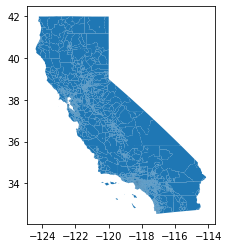

In [7]:
# Plot the gdf
tracts_gdf.plot()

> ### Wow! How cool is that?

### Select Census Tracts for Alameda County

We want to subset the tracts to get the data for Alameda county. In order to do this, let's first check what variables we have and what the data looks like.

In [8]:
tracts_gdf.head(3)

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,06,009,000300,1400000US06009000300,06009000300,3,CT,457009794,394122,"POLYGON ((-120.76399 38.21389, -120.76197 38.2..."
1,06,011,000300,1400000US06011000300,06011000300,3,CT,952744514,195376,"POLYGON ((-122.50006 39.12232, -122.50022 39.1..."
2,06,013,303102,1400000US06013303102,06013303102,3031.02,CT,6507019,0,"POLYGON ((-121.72937 37.96884, -121.71409 37.9..."


In [9]:
tracts_gdf.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')

Here's what each variable means:
- `STATEFP`: State FIPS code 
- `COUNTYFP`: County FIPS code
- `TRACTCE`: Census tract code
- `AFFGEOID`: Summary level code + geovariant code + '00US' + GEOID
- `GEOID`:  Census tract identifier; a concatenation of Current state FIPS code, county FIPS code, and census tract code
- `NAME`:  Census tract name
- `LSAD`:  Legal/statistical description with the census tract name
- `ALAND`: Area that is land, in square meters
- `AWATER`:  Area that is water, in square meters
- `geometry`: Geometry of tract

Let's take a closer look at the county identifiers.

In [10]:
# Are the county codes
tracts_gdf['COUNTYFP'].unique()

array(['009', '011', '013', '037', '017', '019', '001', '005', '007',
       '039', '041', '043', '045', '047', '049', '051', '053', '023',
       '025', '027', '029', '031', '057', '059', '071', '073', '067',
       '069', '065', '055', '061', '085', '081', '083', '063', '111',
       '113', '075', '077', '079', '089', '093', '095', '097', '099',
       '101', '103', '105', '107', '087', '109', '115', '021', '015',
       '033', '035', '091', '003'], dtype=object)

Since the county code for Alameda County is `001`, let's subset our data using that knowledge so we can focus on our area of interest.

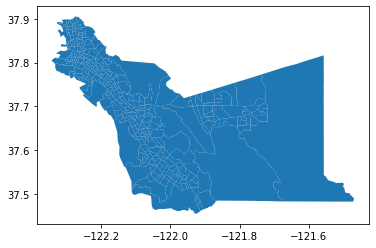

In [11]:
tracts_gdf_ac = tracts_gdf[tracts_gdf['COUNTYFP']=='001']
tracts_gdf_ac.plot()
plt.show()

Nice! Looks like we have what we were looking for.

*FYI*: You can also make dynamic plots of one or more county without saving to a new gdf.

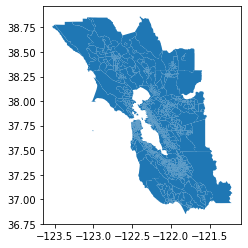

In [12]:
# Dynamic plot of the census tracts for the 10 County Bay Area
# Alameda, Contra Costa, Marin, Napa, San Francisco, San Mateo, Santa Clara, Santa Cruz, Solano, Sonoma
tracts_gdf[tracts_gdf['COUNTYFP'].isin(['001','013','041','055','075','081', '085','087','095','097'])].plot()


Amazing work! Now.. aren't you *hungry* to learn more about how to use our geospatial data?

<div style="display:inline-block;vertical-align:top;">
    <img src="../../assets/images/IMG_8575.jpg" align=center width=500 > 
</div>  
<div style="display:inline-block;">



## 2.6 Challenge

Subset `tracts_gdf` to be for Contra Costa County and plot it.

In [13]:
# Your code here

## Other Resources
> - The Open Textbook Library: [Essentials of Geographic Information Systems by Jonathan E. Campbell and Michael Shin](http://open.umn.edu/opentextbooks/BookDetail.aspx?bookId=67)
> - The Open Textbook Library: [Nature of Geographic Information Systems by David DiBiase](http://open.umn.edu/opentextbooks/BookDetail.aspx?bookId=428) from Esri.
> - Online Gitbook: [Intro to GIS and Spatial Analysis by Manuel Gimond](https://mgimond.github.io/Spatial/index.html)

---
<div style="display:inline-block;vertical-align:middle;">
<a href="https://dlab.berkeley.edu/" target="_blank"><img src ="../../assets/images/dlab_logo.png" width="75" align="left">
</a>
</div>

<div style="display:inline-block;vertical-align:middle;">
    <div style="font-size:larger">&nbsp;D-Lab @ University of California - Berkeley</div>
    <div>&nbsp;Team Geo<div>
</div>
        
